# La esfera de Bloch
Material didáctico elaborado por Sergio Tello - 2020

### Advertencia:
Para que puedas interactuar con las esferas (rotarlas con el mouse) puede ser necesario ejecutar la celda de importación de las librerías más de una vez. Para cambiar el tamaño de las esferas ajusta la ventana arrastrando la esquina inferior derecha.

In [6]:
# Importación de librerías (asegúrate de importar tus propias liberías)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import LibreriaOperacionesNumerosComplejos as nc
import LibreriaOperacionesVectoresMatricesComplejos as vm
%matplotlib notebook

#Importante: Debes traducir las funciones de mis librerías de números complejos y de vectores 
#y matrices a las tuyas. Haz los cambios necesarios a lo largo de todo el Notebook.


#Función fundamental. Para entender lo que hace, referirse al texto desde la página 160.
def KetABloch(V):
    '''
    Esta función recibe un ket (no tiene que estar normalizado previamente) 
    y retorna una lista con los ángulos phi y theta que permitirán representarlo
    dentro de la Esfera de Bloch
    '''
    V  = vm.multiplicacionEscalarVector(V,[(1/vm.normaVector(V)), 0])
    pol0 = nc.conversionComplejoPolar(V[0][0])
    pol1 = nc.conversionComplejoPolar(V[1][0])
    phi = pol1[1] - pol0[1] #La resta de las fases
    theta = np.arctan2(pol1[0], pol0[0])
    return [phi, theta]

In [7]:
#Declaración de vectores básicos

#Para facilitar la escritura de 1/sqrt(2)
r = 1/np.sqrt(2)
m = np.sqrt(2)/2


cero = [[[1,0]],
        [[0,0]]]

uno = [[[0,0]],
       [[1,0]]]

mas = [[[r,0]],
       [[r,0]]]

menos = [[[r,0]],
         [[-r,0]]]

adentro = [[[r,0]],
           [[0,r]]]

afuera = [[[0,r]],
          [[r,0]]]

#Lista con todos los vectores de las 3 bases. Formato: vector / atributo de color / etiqueta
Bases = [[cero, 'blue', '|0>'], [uno,'darkorange', '|1>'], [mas,'green', '|+>'], [menos,'red', '|->'], [adentro,'cyan', '|in>'], [afuera,'magenta', '|out>']]


In [8]:
#Declaración de matrices para transformar la esfera de Bloch
I = [[[1,0],[0,0]],
     [[0,0],[1,0]]]

X = [[[0,0],[1,0]],
     [[1,0],[0,0]]]

Y = [[[0,0],[0,-1]],
     [[0,1],[0,0]]]

Z = [[[1,0],[0,0]],
     [[0,0],[0,-1]]]

S = [[[1,0],[0,0]],
     [[0,0],[0,1]]]

T = [[[1,0],[0,0]],
     [[0,0],[m,m]]]

H = [[[r,0],[r,0]],
     [[r,0],[-r,0]]]

NOT = [[[r,0],[-r,0]],
       [[r,0],[r,0]]]

# Matriz de Dinamica X

A continuacion se presenta el codigo que despues de su ejecucion mostrara una esfera de Bloch basica, sin cambios realizados, y al lado derecho de esta se mostrara la esfera de Bloch para la matriz de dinamica de la compuerta $X$. Luego de esto se presentara el analisis para lo mostrado despues de la ejecucion.

<IPython.core.display.Javascript object>


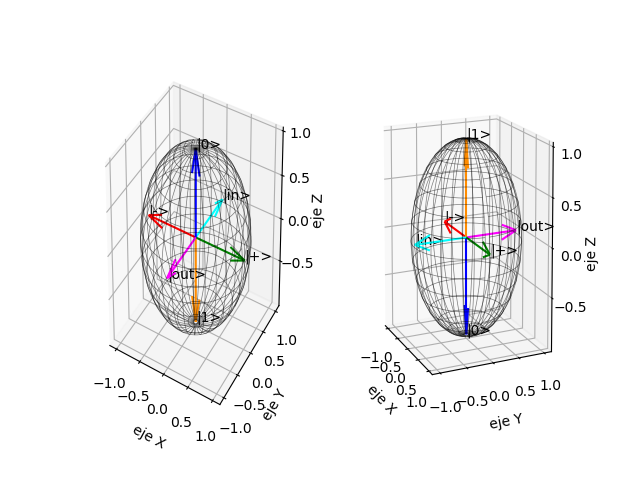

In [9]:
# Gráfica de la primera esfera (posición inicial o estándar)
########################################################################################

fig = plt.figure()

ax = fig.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)


for V in Bases:
    p = KetABloch(V[0])
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax.text(x, y, z, V[2])

ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
ax.set_zlabel('eje Z')
    
# Gráfica de la segunda esfera (posición después de la transformación)
########################################################################################

ax1 = fig.add_subplot(122, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax1.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)

for V in Bases:
    W = vm.productoMatriz(X, V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax1.text(x, y, z, V[2])

ax1.set_xlabel('eje X')
ax1.set_ylabel('eje Y')
ax1.set_zlabel('eje Z')  

plt.show()

## Análisis para la Matriz de Dinamica X

Aquí podemos ver dos eferas de Bloch. La primera esfera (la mostrada a la izquierda), es la esfera basica de Bloch sin haber insertado allí una de las matrices de dinamica cuantica. Y la segunda esfera (la mostrada a la derecha), es la matriz de dinamica $X$ en la cual se observa que, en comparacion con la esfera original, tenemos que los vectores de entrada y salida estan invertidos al igual que los vectores para el ket |0> y para el ket |1>.

# Matriz de Dinamica I

A continuacion se mostraran dos esferas, la primera esfera mostrara una esfera en un estado basico de la esfera de Bloch, y la segunda esfera ubicada a la derecha de la primera que representa nuestra matriz de dinamica $I$ transformada para ser representada en una esfera de Bloch.

<IPython.core.display.Javascript object>


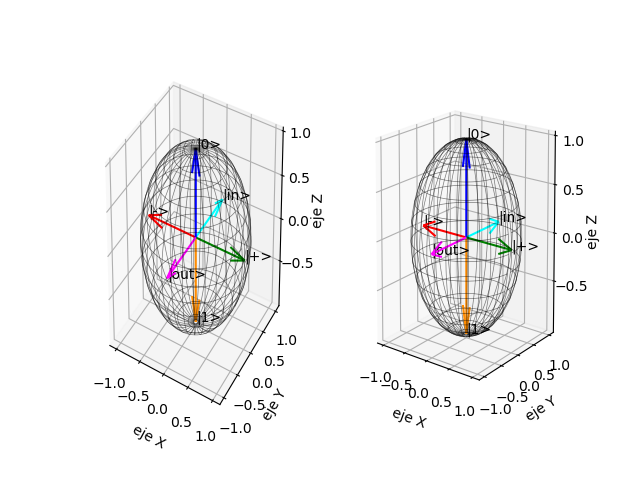

In [10]:
# Gráfica de la primera esfera (posición inicial o estándar)
########################################################################################
fig1 = plt.figure()

ax = fig1.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)


for V in Bases:
    p = KetABloch(V[0])
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax.text(x, y, z, V[2])

ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
ax.set_zlabel('eje Z')

# Gráfica de la segunda esfera (posición después de la transformación)
########################################################################################
ax1 = fig1.add_subplot(122, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax1.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)

for V in Bases:
    W = vm.productoMatriz(I,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax1.text(x, y, z, V[2])

ax1.set_xlabel('eje X')
ax1.set_ylabel('eje Y')
ax1.set_zlabel('eje Z') 

plt.show()

## Análisis para la Matriz de Dinamica I

Al igual que en la esfera de Bolch para la matriz de dinamica de $X$, en este caso, para nuestra matriz de dinamica $I$ no nos muestra ningun cambio en relacion con la esfera original.

# Matriz de Dinamica H

Se mostrara a continuacion el codigo y el resultado de su ejecucion de dos eferas de Bolch. Una de ellas sera la estandar y la otra sera nuestra matriz de dinamica representada en dicha esfera.

<IPython.core.display.Javascript object>


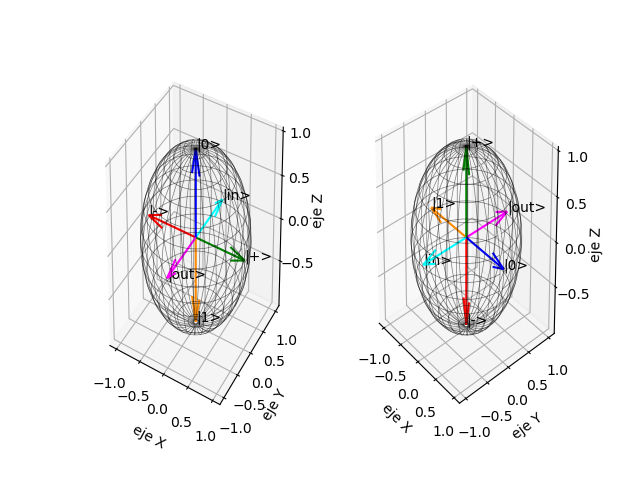

In [11]:
# Gráfica de la primera esfera (posición inicial o estándar)
########################################################################################
fig2 = plt.figure()

ax = fig2.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)


for V in Bases:
    p = KetABloch(V[0])
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax.text(x, y, z, V[2])

ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
ax.set_zlabel('eje Z')

# Gráfica de la segunda esfera (posición después de la transformación)
########################################################################################
ax1 = fig2.add_subplot(122, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax1.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)

for V in Bases:
    W = vm.productoMatriz(H,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax1.text(x, y, z, V[2])

ax1.set_xlabel('eje X')
ax1.set_ylabel('eje Y')
ax1.set_zlabel('eje Z') 

plt.show()

## Análisis para la Matriz de Dinamica H

Para este caso podemos ver que en nuestra matriz de Hadamart, en comparacion con la esfera de Bloch original, los vectores de entrada y salida de nuestra matriz estan invertidos, ademas que hacia el polo norte tenemos los ket positivos y los negativos estaran hacia el sur. Y que por ultimo los vectores para los ket $|0>$ y $|1>$ estaran sobre el eje X, apuntando el vector del ket $|1>$ hacia los negativos y el ket $|0>$ hacia los positivos sobre el eje X.

# Matriz de Dinamica Y

Se mostrara a continuacion el codigo y el resultado de su ejecucion de dos eferas de Bolch. Una de ellas sera la estandar y la otra sera nuestra matriz de dinamica representada en dicha esfera.

<IPython.core.display.Javascript object>


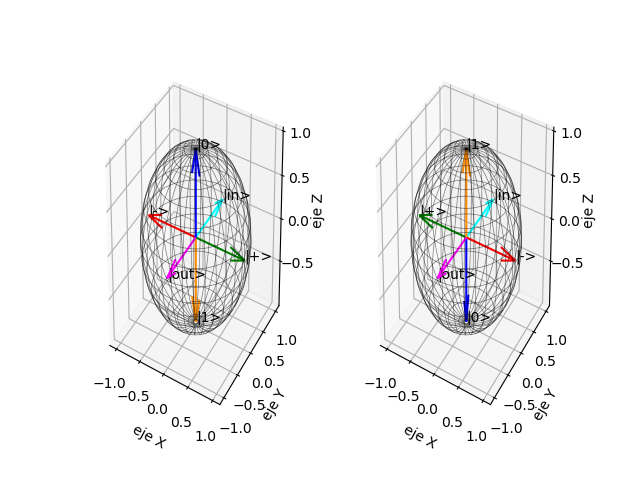

In [12]:
# Gráfica de la primera esfera (posición inicial o estándar)
########################################################################################
fig3 = plt.figure()

ax = fig3.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)


for V in Bases:
    p = KetABloch(V[0])
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax.text(x, y, z, V[2])

ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
ax.set_zlabel('eje Z')

# Gráfica de la segunda esfera (posición después de la transformación)
########################################################################################
ax1 = fig3.add_subplot(122, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax1.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)

for V in Bases:
    W = vm.productoMatriz(Y,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax1.text(x, y, z, V[2])

ax1.set_xlabel('eje X')
ax1.set_ylabel('eje Y')
ax1.set_zlabel('eje Z') 

plt.show()

# Matriz de Dinamica Z

Se mostrara a continuacion el codigo y el resultado de su ejecucion de dos eferas de Bolch. Una de ellas sera la estandar y la otra sera nuestra matriz de dinamica representada en dicha esfera.

<IPython.core.display.Javascript object>


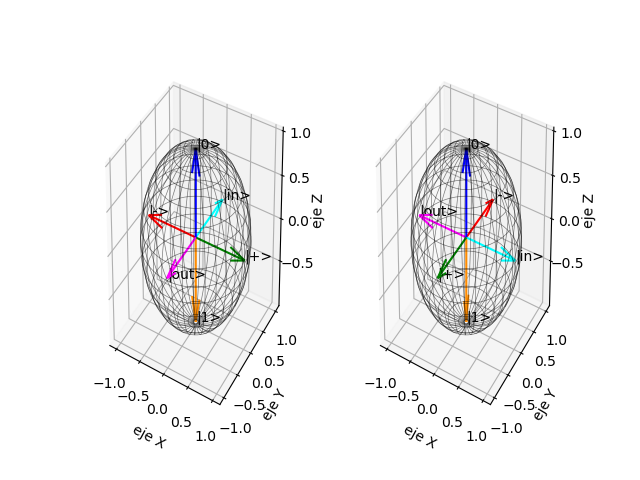

In [13]:
# Gráfica de la primera esfera (posición inicial o estándar)
########################################################################################
fig4 = plt.figure()

ax = fig4.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)


for V in Bases:
    p = KetABloch(V[0])
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax.text(x, y, z, V[2])

ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
ax.set_zlabel('eje Z')

# Gráfica de la segunda esfera (posición después de la transformación)
########################################################################################
ax1 = fig4.add_subplot(122, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax1.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)

for V in Bases:
    W = vm.productoMatriz(Z,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax1.text(x, y, z, V[2])

ax1.set_xlabel('eje X')
ax1.set_ylabel('eje Y')
ax1.set_zlabel('eje Z') 

plt.show()

# Matriz de Dinamica S

Se mostrara a continuacion el codigo y el resultado de su ejecucion de dos eferas de Bolch. Una de ellas sera la estandar y la otra sera nuestra matriz de dinamica representada en dicha esfera.

<IPython.core.display.Javascript object>


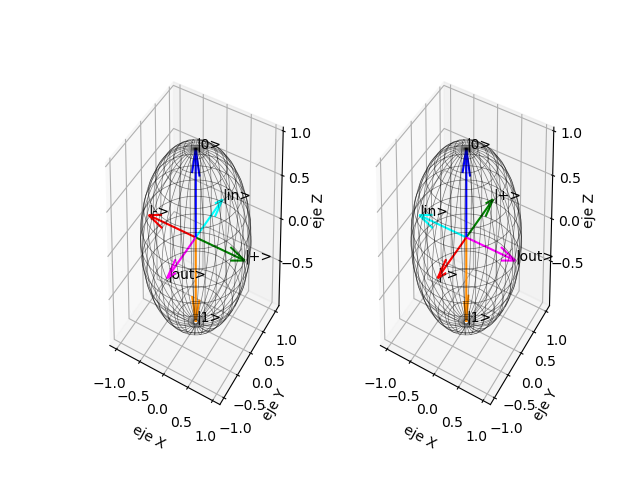

In [14]:
# Gráfica de la primera esfera (posición inicial o estándar)
########################################################################################
fig5 = plt.figure()

ax = fig5.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)


for V in Bases:
    p = KetABloch(V[0])
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax.text(x, y, z, V[2])

ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
ax.set_zlabel('eje Z')

# Gráfica de la segunda esfera (posición después de la transformación)
########################################################################################
ax1 = fig5.add_subplot(122, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax1.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)

for V in Bases:
    W = vm.productoMatriz(S,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax1.text(x, y, z, V[2])

ax1.set_xlabel('eje X')
ax1.set_ylabel('eje Y')
ax1.set_zlabel('eje Z') 

plt.show()

# Matriz de Dinamica T

Se mostrara a continuacion el codigo y el resultado de su ejecucion de dos eferas de Bolch. Una de ellas sera la estandar y la otra sera nuestra matriz de dinamica representada en dicha esfera.

<IPython.core.display.Javascript object>


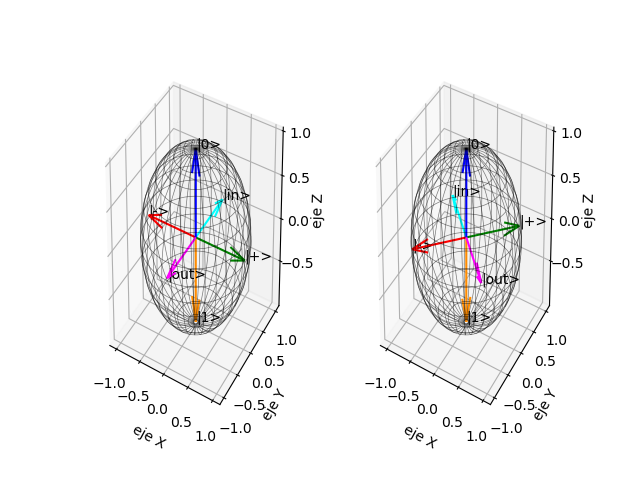

In [15]:
# Gráfica de la primera esfera (posición inicial o estándar)
########################################################################################
fig5 = plt.figure()

ax = fig5.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)


for V in Bases:
    p = KetABloch(V[0])
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax.text(x, y, z, V[2])

ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
ax.set_zlabel('eje Z')

# Gráfica de la segunda esfera (posición después de la transformación)
########################################################################################
ax1 = fig5.add_subplot(122, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax1.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)

for V in Bases:
    W = vm.productoMatriz(T,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax1.text(x, y, z, V[2])

ax1.set_xlabel('eje X')
ax1.set_ylabel('eje Y')
ax1.set_zlabel('eje Z') 

plt.show()

# Matriz de Dinamica $\sqrt{NOT}$

Se mostrara a continuacion el codigo y el resultado de su ejecucion de dos eferas de Bolch. Una de ellas sera la estandar y la otra sera nuestra matriz de dinamica representada en dicha esfera.

<IPython.core.display.Javascript object>


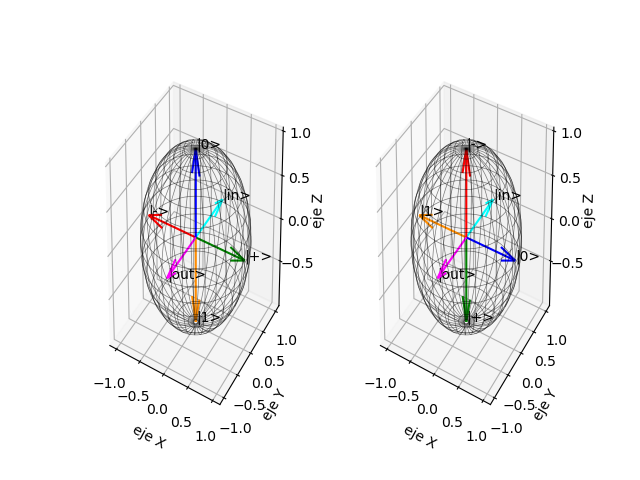

In [16]:
# Gráfica de la primera esfera (posición inicial o estándar)
########################################################################################
fig6 = plt.figure()

ax = fig6.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)


for V in Bases:
    p = KetABloch(V[0])
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax.text(x, y, z, V[2])

ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
ax.set_zlabel('eje Z')

# Gráfica de la segunda esfera (posición después de la transformación)
########################################################################################
ax1 = fig6.add_subplot(122, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax1.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)

for V in Bases:
    W = vm.productoMatriz(NOT,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax1.text(x, y, z, V[2])

ax1.set_xlabel('eje X')
ax1.set_ylabel('eje Y')
ax1.set_zlabel('eje Z') 

plt.show()

# Matriz de Dinamica $R(\theta)$

Se mostrara a continuacion el codigo y el resultado de su ejecucion de dos eferas de Bolch. Una de ellas sera la estandar y la otra sera nuestra matriz de dinamica representada en dicha esfera.

Para este caso probaremos con 4 angulos, los cuales seran $\frac{\pi}{2}$, $\frac{\pi}{3}$, $\frac{\pi}{4}$, $\frac{\pi}{6}$. Ademas, en este caso y los siguientes no se mostraran la esfera orginal y luego su transformacion respectiva segun la matriz de dinamica que estemos observando. Las dos primeras que se muestran son las pertenecientes a $\frac{\pi}{2}$ y $\frac{\pi}{3}$, y las dos siguientes que seran las de abajo son las correspondientes a $\frac{\pi}{4}$ y $\frac{\pi}{6}$.

<IPython.core.display.Javascript object>


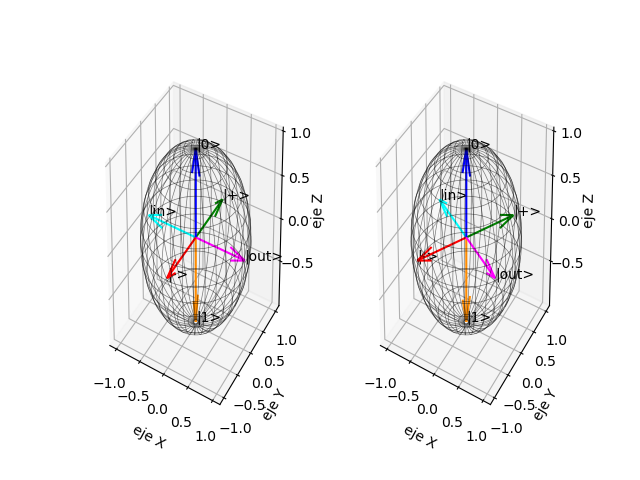

<IPython.core.display.Javascript object>


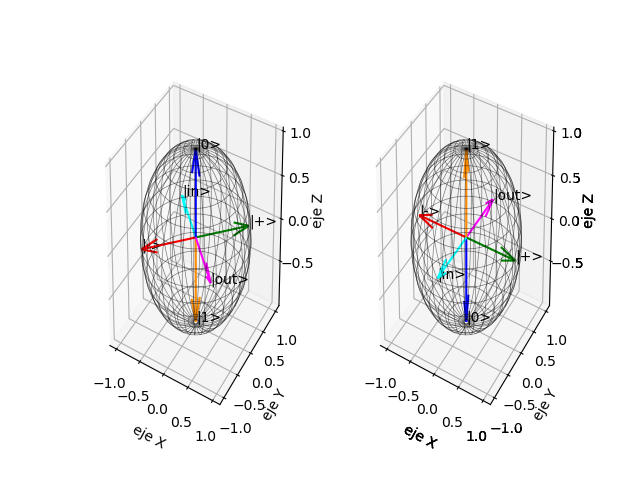

In [17]:
R01 = [[[1,0],[0,0]],
       [[0,0],[0,1]]]

R02 = [[[1,0],[0,0]],
       [[0,0],[1/2,np.sqrt(3)/2]]]

R03 = [[[1,0],[0,0]],
       [[0,0],[np.sqrt(2)/2,np.sqrt(2)/2]]]

R04 = [[[1,0],[0,0]],
       [[0,0],[np.sqrt(3)/2,1/2]]]

# Gráfica de la primera esfera (posición inicial o estándar)
########################################################################################
fig7 = plt.figure()

ax = fig7.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)


for V in Bases:
    W = vm.productoMatriz(R01,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax.text(x, y, z, V[2])

ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
ax.set_zlabel('eje Z')

# Gráfica de la segunda esfera (posición después de la transformación)
########################################################################################
ax1 = fig7.add_subplot(122, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax1.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)

for V in Bases:
    W = vm.productoMatriz(R02,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax1.text(x, y, z, V[2])

ax1.set_xlabel('eje X')
ax1.set_ylabel('eje Y')
ax1.set_zlabel('eje Z') 

plt.show()

# Gráfica de la primera esfera (posición inicial o estándar)
########################################################################################
fig7 = plt.figure()

ax = fig7.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)


for V in Bases:
    W = vm.productoMatriz(R03,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax.text(x, y, z, V[2])

ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
ax.set_zlabel('eje Z')

# Gráfica de la segunda esfera (posición después de la transformación)
########################################################################################
ax1 = fig7.add_subplot(122, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax1.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)

for V in Bases:
    W = vm.productoMatriz(R04,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax1.text(x, y, z, V[2])

ax1.set_xlabel('eje X')
ax1.set_ylabel('eje Y')
ax1.set_zlabel('eje Z') 

plt.show()

# Matriz de Dinamica $R_{x}(\theta)$

Para este caso probaremos con 2 angulos, los cuales seran $\frac{\pi}{2}$ y $\pi$.

<IPython.core.display.Javascript object>


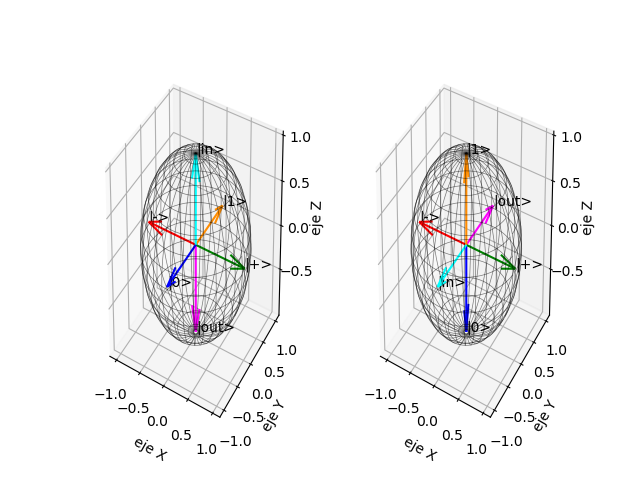

In [21]:
a = np.sin(np.pi/4)
b = np.cos(np.pi/4)

Rx1 = [[[b,0],[0,-a]],
      [[0,-a],[b,0]]]

fig9 = plt.figure()

ax = fig9.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)


for V in Bases:
    W = vm.productoMatriz(Rx1,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax.text(x, y, z, V[2])

ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
ax.set_zlabel('eje Z')
    
a = np.sin(np.pi/2)
b = np.cos(np.pi/2)

Rx2 = [[[b,0],[0,-a]],
       [[0,-a],[b,0]]]
    
ax1 = fig9.add_subplot(122, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax1.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)

for V in Bases:
    W = vm.productoMatriz(Rx2,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax1.text(x, y, z, V[2])

ax1.set_xlabel('eje X')
ax1.set_ylabel('eje Y')
ax1.set_zlabel('eje Z') 

plt.show()

# Matriz de Dinamica $R_{y}(\theta)$

Para este caso probaremos con 2 angulos, los cuales seran $\frac{\pi}{2}$ y $\pi$.

<IPython.core.display.Javascript object>


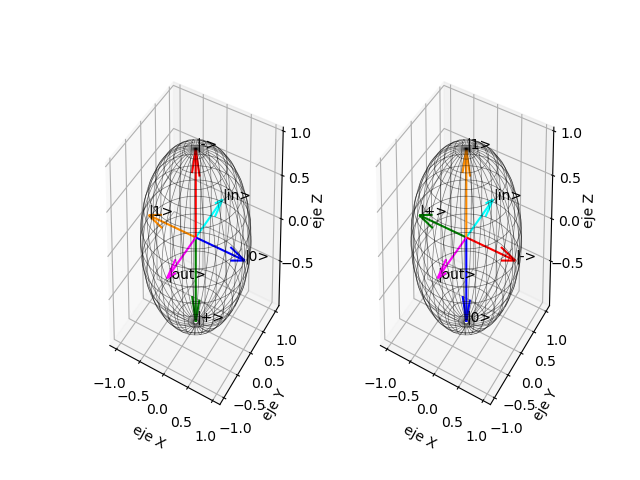

In [22]:
a = np.sin(np.pi/4)
b = np.cos(np.pi/4)

Rx1 = [[[b,0],[-a,0]],
      [[a,0],[b,0]]]

fig9 = plt.figure()

ax = fig9.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)


for V in Bases:
    W = vm.productoMatriz(Rx1,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax.text(x, y, z, V[2])

ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
ax.set_zlabel('eje Z')
    
a = np.sin(np.pi/2)
b = np.cos(np.pi/2)

Rx2 = [[[b,0],[-a,0]],
      [[a,0],[b,0]]]
    
ax1 = fig9.add_subplot(122, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax1.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)

for V in Bases:
    W = vm.productoMatriz(Rx2,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax1.text(x, y, z, V[2])

ax1.set_xlabel('eje X')
ax1.set_ylabel('eje Y')
ax1.set_zlabel('eje Z') 

plt.show()

# Matriz de Dinamica $R_{z}(\theta)$

Para este caso probaremos con 2 angulos, los cuales seran $\frac{\pi}{2}$ y $\pi$.

<IPython.core.display.Javascript object>


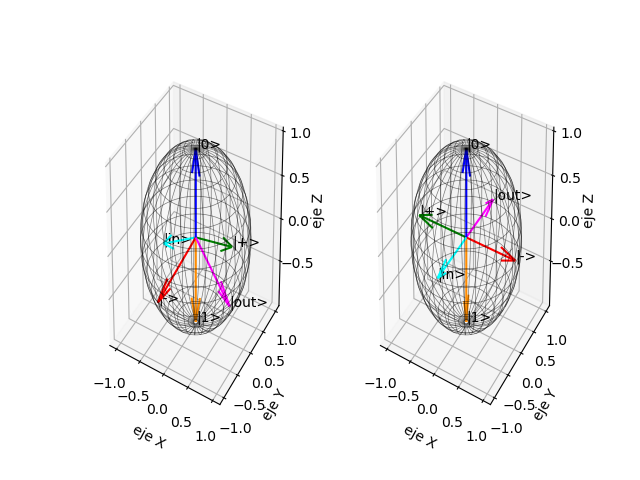

In [24]:
Rx1 = [[[np.sqrt(2)/2,-np.sqrt(2)/2],[0,0]],
      [[0,0],[np.sqrt(2),np.sqrt(2)/2]]]

fig9 = plt.figure()

ax = fig9.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)


for V in Bases:
    W = vm.productoMatriz(Rx1,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax.text(x, y, z, V[2])

ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
ax.set_zlabel('eje Z')
    
a = np.sin(np.pi/2)
b = np.cos(np.pi/2)

Rx2 = [[[0,-1],[0,0]],
      [[0,0],[0,1]]]
    
ax1 = fig9.add_subplot(122, projection='3d')
u, v = np.mgrid[0:2*np.pi:0.1, 0:np.pi:0.1]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)


ax1.plot_wireframe(x, y, z, color="k",rstride=2, cstride=2, linewidth=0.5, alpha=0.5)

for V in Bases:
    W = vm.productoMatriz(Rx2,V[0]) #Colocar aquí la matriz de transformación deseada (en reemplazo de X) 
    p = KetABloch(W)
    u = p[0]
    v = 2*p[1]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.quiver(0, 0, 0, x, y, z, length=1, normalize=True, color=V[1])
    ax1.text(x, y, z, V[2])

ax1.set_xlabel('eje X')
ax1.set_ylabel('eje Y')
ax1.set_zlabel('eje Z') 

plt.show()